In [58]:
1

1

In [1]:
from core.imports import *

In [4]:
n_negs = 5

In [39]:

fname = 'nip_10000_5negs_v6_some_ev.pkl'
fname = 'nip_100000_5negs_v6_full_ev.pkl'

In [11]:
fname = 'nip_100000_5negs_v7_full_ev.pkl'
# fname='nip_1000000_5negs_v7_full_ev.pkl'

In [34]:
!ls -lht | grep pkl | head

-rw-r--r-- 1 root root 2.3M Jan 27 15:19 nip_100000_5negs_v7_full_ev_sl.pkl
-rw-r--r-- 1 root root 189M Dec 30 23:34 nip_100000_5negs_v9_full_ev.pkl
-rw-r--r-- 1 root root  58M Dec 30 11:10 nip_None_5negs_v8_full_ev.pkl
-rw-r--r-- 1 root root  22M Dec 29 22:40 nip_100000_5negs_v8_full_ev.pkl
-rw-r--r-- 1 root root 8.6M Dec 29 15:30 nip_1000000_5negs_v7_full_ev.pkl
-rw-r--r-- 1 root root 103M Dec 29 13:18 nip_100000_5negs_v7_full_ev.pkl
-rw-r--r-- 1 root root  21M Dec 28 23:23 nip_None_5negs_v6_full_ev.pkl
-rw-r--r-- 1 root root  24M Dec 28 09:33 nip_100000_5negs_v6_full_ev.pkl
-rw-r--r-- 1 root root 2.2M Dec 28 01:24 nip_10000_5negs_v6_some_ev.pkl
-rw-r--r-- 1 root root 4.0M Dec 28 00:21 nip_100000_10negs_v5_full_ev_eval_cands.pkl


In [56]:
fname = 'nip_100000_5negs_v7_full_ev.pkl'

In [61]:
fname = 'nip_100000_5negs_v7_full_ev_sl.pkl'

In [62]:
results = []
with open(fname, 'rb') as f:
    l = pkl.load(f)

for e in l:
    e['negs'] = n_negs

results.extend(l)

for r in results:
    r.pop('model')

for r in results:
    r.update(r['features_kwargs'])
#     r['co_count_pos'] = r['features_kwargs']['co_count_pos']

for r in results:
    n = len(r['ev_inv_ranks'])
    r['ev_mrr/seen'] = r['ev_inv_ranks'][r['was_seen_eval'][:n]].mean()
    r['ev_mrr/unseen'] = r['ev_inv_ranks'][~r['was_seen_eval'][:n]].mean()
    
    r['tr_mrr/seen'] = r['tr_inv_ranks'][r['was_seen_tr']].mean()
    r['tr_mrr/unseen'] = r['tr_inv_ranks'][~r['was_seen_tr']].mean()
    
    r['te_mrr/seen'] = r['te_inv_ranks'][r['was_seen_te']].mean()
    r['te_mrr/unseen'] = r['te_inv_ranks'][~r['was_seen_te']].mean()

len(results)

7

In [52]:
{k: v for k, v in results[0].items() if not isinstance(v, list) and not isinstance(v, np.ndarray)}

{'tr_roc': 0.848018692628012,
 'te_roc': 0.8052330003549516,
 'tr_ap': 0.5168805271914372,
 'te_ap': 0.453491384124734,
 'ev_mrr': 0.24917730331743917,
 'ev_mrr_model': 0.2945136696627558,
 'ev_mrr_fallback': 0.09525663682034397,
 'tr_mrr': 0.5988265859243389,
 'tr_mrr_model': 0.4774880237084143,
 'tr_mrr_fallback': 0.7810780809795833,
 'te_mrr': 0.6337391250272293,
 'te_mrr_model': 0.49211969315970594,
 'te_mrr_fallback': 0.8185683196530547,
 'features_kwargs': {'cocounts': False, 'cocount_pos_target_encoder': True},
 'n_estimators': 300,
 'total_time': 1021.9347243309021,
 'negs': 5,
 'cocounts': False,
 'cocount_pos_target_encoder': True,
 'ev_mrr/seen': 0.4763137071635279,
 'ev_mrr/unseen': 0.20072911569297555,
 'tr_mrr/seen': 0.6222722986033171,
 'tr_mrr/unseen': 0.590587528540403,
 'te_mrr/seen': 0.6350382658471873,
 'te_mrr/unseen': 0.6332821438769771}

In [53]:
{k: v for k, v in results_win[0].items() if not isinstance(v, list) and not isinstance(v, np.ndarray)}

{'tr_roc': 0.848018692628012,
 'te_roc': 0.8052330003549516,
 'tr_ap': 0.5168805271914372,
 'te_ap': 0.453491384124734,
 'ev_mrr': 0.28857120526729485,
 'ev_mrr_model': 0.3340233508935729,
 'ev_mrr_fallback': 0.13425745865530023,
 'tr_mrr': 0.26248765953491354,
 'tr_mrr_model': 0.24507848853643008,
 'tr_mrr_fallback': 0.2886363742073345,
 'te_mrr': 0.1966572998530012,
 'te_mrr_model': 0.21618102239997264,
 'te_mrr_fallback': 0.1711766587653404,
 'features_kwargs': {'cocounts': False, 'cocount_pos_target_encoder': True},
 'n_estimators': 300,
 'total_time': 1104.5694417953491,
 'negs': 5,
 'cocounts': False,
 'cocount_pos_target_encoder': True,
 'ev_mrr/seen': 0.5377803788733321,
 'ev_mrr/unseen': 0.2354148965639829,
 'tr_mrr/seen': 0.3063828538876197,
 'tr_mrr/unseen': 0.24706245023960247,
 'te_mrr/seen': 0.2594637447441552,
 'te_mrr/unseen': 0.17456472837138218}

In [48]:
results_win[0]['encoders']

['gru_cid']

In [30]:
r['ev_mrr']

0.243192799286371

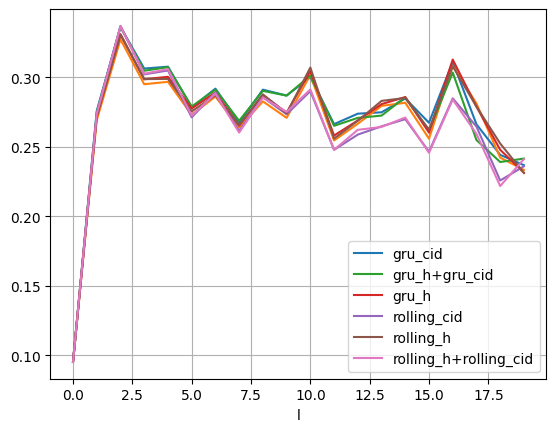

In [66]:
for r in results:
    pd.DataFrame(dict(l=r['ev_seq_length'], ir=r['ev_inv_ranks'])).groupby('l').ir.mean()[:20].plot(label='+'.join(r['encoders']))

plt.legend(loc='best')
plt.grid()

In [54]:
results.sort(key=lambda x: -x['ev_mrr'])

In [63]:
metrics = ['ev_mrr/seen', 'ev_mrr/unseen', 'tr_mrr', 'te_mrr', 'tr_mrr/seen', 'tr_mrr/unseen', 'te_mrr/seen', 'te_mrr/unseen']
df = pd.DataFrame(results)[['encoders', 'cocount_pos_target_encoder', 'n_estimators', 'ev_mrr', 'ev_mrr_model', 'ev_mrr_fallback'] + metrics + ['total_time', 'tr_roc', 'te_roc', 'tr_ap', 'te_ap']]
df = df.rename(columns=dict(cocount_pos_target_encoder='cocount_te'))
# df = df[df.n_estimators == 300]
df = df[df.cocount_te]
df['lift'] = df.ev_mrr / df.ev_mrr.min()
df.sort_values('ev_mrr', ascending=False)

,encoders,cocount_te,n_estimators,ev_mrr,ev_mrr_model,ev_mrr_fallback,ev_mrr/seen,ev_mrr/unseen,tr_mrr,te_mrr,tr_mrr/seen,tr_mrr/unseen,te_mrr/seen,te_mrr/unseen,total_time,tr_roc,te_roc,tr_ap,te_ap,lift
0,[gru_cid],True,300,0.249177,0.294514,0.095257,0.476314,0.200729,0.598827,0.633739,0.622272,0.590588,0.635038,0.633282,1021.934724,0.848019,0.805233,0.516881,0.453491,1.024608
2,"[gru_h, gru_cid]",True,300,0.248603,0.293770,0.095257,0.475277,0.200253,0.598614,0.635459,0.621650,0.590519,0.638510,0.634386,1448.952839,0.850360,0.803805,0.525195,0.458535,1.022247
6,"[rolling_h, rolling_cid]",True,300,0.246682,0.291284,0.095257,0.474150,0.198164,0.597495,0.634921,0.616567,0.590793,0.636825,0.634250,1279.616093,0.843139,0.805064,0.514803,0.463531,1.014349
4,[rolling_cid],True,300,0.246613,0.291194,0.095257,0.475511,0.197789,0.596764,0.635317,0.615890,0.590043,0.640293,0.633567,946.319294,0.841535,0.802765,0.512279,0.458235,1.014062
3,[gru_h],True,300,0.245722,0.290041,0.095257,0.443323,0.203574,0.582050,0.628381,0.564236,0.588310,0.605575,0.636404,764.277645,0.796587,0.717281,0.481241,0.394491,1.010401
5,[rolling_h],True,300,0.245473,0.289718,0.095257,0.442014,0.203551,0.581332,0.628527,0.563759,0.587508,0.605597,0.636593,666.777978,0.796229,0.718506,0.480141,0.398118,1.009376
1,[],True,300,0.243193,0.286766,0.095257,0.438834,0.201463,0.580354,0.628149,0.562968,0.586464,0.605784,0.636015,292.750131,0.784922,0.705669,0.462012,0.380043,1.000000


In [55]:
metrics = ['ev_mrr/seen', 'ev_mrr/unseen', 'tr_mrr', 'te_mrr', 'tr_mrr/seen', 'tr_mrr/unseen', 'te_mrr/seen', 'te_mrr/unseen']
df = pd.DataFrame(results)[['encoders', 'cocount_pos_target_encoder', 'n_estimators', 'ev_mrr', 'ev_mrr_model', 'ev_mrr_fallback'] + metrics + ['total_time', 'tr_roc', 'te_roc', 'tr_ap', 'te_ap']]
df = df.rename(columns=dict(cocount_pos_target_encoder='cocount_te'))
# df = df[df.n_estimators == 300]
df = df[df.cocount_te]
df['lift'] = df.ev_mrr / df.ev_mrr.min()
df.sort_values('ev_mrr', ascending=False)#.to_csv('NIP_target_encoder_unseen.csv', index=False)

,encoders,cocount_te,n_estimators,ev_mrr,ev_mrr_model,ev_mrr_fallback,ev_mrr/seen,ev_mrr/unseen,tr_mrr,te_mrr,tr_mrr/seen,tr_mrr/unseen,te_mrr/seen,te_mrr/unseen,total_time,tr_roc,te_roc,tr_ap,te_ap,lift
0,[gru_cid],True,300,0.249177,0.294514,0.095257,0.476314,0.200729,0.598827,0.633739,0.622272,0.590588,0.635038,0.633282,1021.934724,0.848019,0.805233,0.516881,0.453491,1.024608
1,[],True,300,0.243193,0.286766,0.095257,0.438834,0.201463,0.580354,0.628149,0.562968,0.586464,0.605784,0.636015,292.750131,0.784922,0.705669,0.462012,0.380043,1.000000


In [10]:
df = pd.DataFrame(results)[['tr_mrr', 'te_mrr', 'ev_mrr'] + metrics + ['co_count_pos', 'negs', 'encoders', 'n_estimators', 'total_time']]
# df = df[df.n_estimators == 300]
df = df[~df.co_count_pos]
df['lift'] = df.ev_mrr / df.ev_mrr.min()
df.sort_values('ev_mrr')


KeyError: "['co_count_pos'] not in index"

In [39]:
def bootstrap(data, n=200):
    s = pd.Series(data)
    return np.asarray([s.sample(n=len(s), replace=True).mean() for _ in range(n)])


l = []
for r in tqdm(results):
    ev_boot_mrr = bootstrap(r['ev_inv_ranks'], 500)
    mu = ev_boot_mrr.mean()
    sigma = ev_boot_mrr.std()

    l.append(dict(
        co_count_pos=r['co_count_pos'],
        encoders=r['encoders'],
        n_estimators = r['n_estimators'],
        ev_mrr = mu,
        ev_std = sigma,
        ev_mrr_lbound = mu - 1.96 * sigma,
        ev_mrr_ubound = mu + 1.96 * sigma,
    ))

  0%|          | 0/42 [00:00<?, ?it/s]

In [91]:
for e in l:
    encs = e['encoders']
    e['name'] = ('+'.join(encs) if encs else 'base') + ' ' + str(e['n_estimators']) + ' trees'

In [76]:
df = pd.DataFrame(l).sort_values('ev_mrr', ascending=False)
columns = ['name', 'ev_mrr', 'ev_mrr_lbound', 'ev_mrr_ubound', 'ev_std', 'co_count_pos', 'encoders', 'n_estimators']
df[~df.co_count_pos][columns]

,name,ev_mrr,ev_mrr_lbound,ev_mrr_ubound,ev_std,co_count_pos,encoders,n_estimators
26,gru_h+gru_cid 300 trees,0.214014,0.211209,0.216819,0.001431,False,"[gru_h, gru_cid]",300
8,gru_cid 300 trees,0.212242,0.209466,0.215018,0.001416,False,[gru_cid],300
24,gru_h+gru_cid 100 trees,0.212188,0.209562,0.214814,0.001340,False,"[gru_h, gru_cid]",100
28,gru_h+gru_cid 600 trees,0.211907,0.209087,0.214726,0.001438,False,"[gru_h, gru_cid]",600
6,gru_cid 100 trees,0.210520,0.207599,0.213441,0.001490,False,[gru_cid],100
10,gru_cid 600 trees,0.210259,0.207425,0.213094,0.001446,False,[gru_cid],600
40,rolling_h+rolling_cid 600 trees,0.204013,0.201246,0.206780,0.001412,False,"[rolling_h, rolling_cid]",600
38,rolling_h+rolling_cid 300 trees,0.202849,0.200003,0.205695,0.001452,False,"[rolling_h, rolling_cid]",300
36,rolling_h+rolling_cid 100 trees,0.202736,0.199801,0.205671,0.001497,False,"[rolling_h, rolling_cid]",100
20,rolling_cid 300 trees,0.202341,0.199590,0.205092,0.001404,False,[rolling_cid],300


''

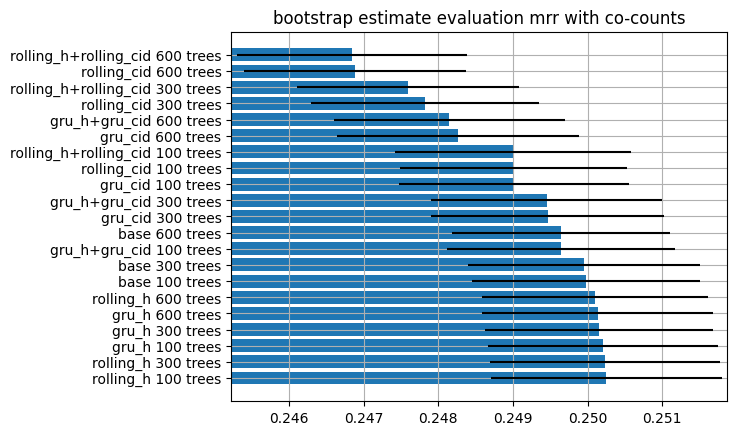

In [66]:
sdf = df[df.co_count_pos]
plt.barh(range(len(sdf)), sdf.ev_mrr, xerr=sdf.ev_std)
plt.xlim(sdf.ev_mrr.min() - sdf.ev_std.max(), sdf.ev_mrr.max() + sdf.ev_std.max())
plt.yticks(range(len(sdf)), sdf.name)#, rotation=90)
plt.title('bootstrap estimate evaluation mrr with co-counts')
plt.grid()
;

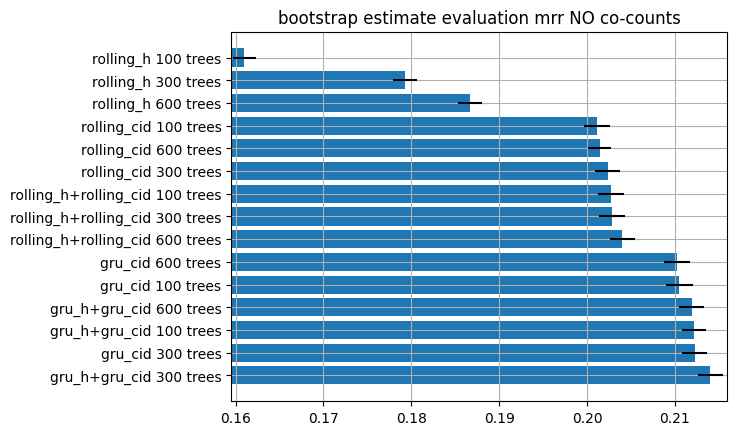

In [72]:
sdf = df[~df.co_count_pos][:15]
plt.barh(range(len(sdf)), sdf.ev_mrr, xerr=sdf.ev_std)
plt.xlim(sdf.ev_mrr.min() - sdf.ev_std.max(), sdf.ev_mrr.max() + sdf.ev_std.max()*1.3)
plt.yticks(range(len(sdf)), sdf.name)#, rotation=90)
plt.title('bootstrap estimate evaluation mrr NO co-counts')
plt.grid()

In [158]:
r['was_seen_eval'].sum(), (~r['was_seen_eval']).sum()

(8609, 40361)

In [157]:
r['ev_inv_ranks'].mean()

0.2105731469741919

In [156]:
r = results[-1]
r['ev_inv_ranks'][~r['was_seen_eval']].mean()

0.15366562774324116

In [88]:
df = pd.DataFrame(results)[['ev_mrr', 'negs', 'encoders', 'n_estimators', 'total_time']]
# df = df[df.n_estimators == 300]
df['lift'] = df.ev_mrr / df.ev_mrr.min()
df.sort_values('ev_mrr')

,ev_mrr,negs,encoders,n_estimators,total_time,lift
0,0.251539,40,[],100,115.350960,1.000000
1,0.252233,40,[gru_cid],100,325.141547,1.002759
2,0.252350,40,[rolling_cid],100,305.711470,1.003225


In [ ]:
0.250961

In [78]:
0.251680/0.250365

1.0052523315958701